# Data Analysis

Now, we have the pixel from Pan-STARRS which the pixel where chosen used the mathc using the Viper and VVDF

In [1]:
try:
    import google.colab
    IN_COLAB = True
except:
    IN_COLAB = False
if IN_COLAB:
    print("Baixando Funções que serão usadas nesse notebook")
    ! shred -u astroFunctions.py
    ! wget https://raw.githubusercontent.com/zxcorr/zxcorr_DataAccess/main/DESzxcorr/pycode/astroFunctions.py -O astroFunctions.py
    ! pip install esutil
    !pip install healpy
    import astroFunctions as astro
    from google.colab import drive
    drive.mount('/content/drive')
else:
    import sys,os
    home = os.getenv("HOME")
    sys.path.append(home+"/Projetos/DESzxcorr/pycode/") # user here the path where we download the folder DESzxcoorr

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import healpy as hp
import astroFunctions as astro
import matplotlib
from astropy.table import Table,QTable
import astropy.io.fits as fits

%matplotlib inline

As we have the data with few pix, we don't need to concern about overload the RAM!!

In [62]:
tab1 = Table.read(home+"/Projetos/DESzxcorr/results/new_match/00028/match_00028.fits").to_pandas()
tab2 = Table.read(home+"/Projetos/DESzxcorr/results/new_match/00035/match_00035.fits").to_pandas()
tab3 = Table.read(home+"/Projetos/DESzxcorr/results/new_match/00042/match_00042.fits").to_pandas()
tab4 = Table.read(home+"/Projetos/DESzxcorr/results/new_match/00049/match_00049.fits").to_pandas()
tab5 = Table.read(home+"/Projetos/DESzxcorr/results/new_match/00056/match_00056.fits").to_pandas()
tab6 = Table.read(home+"/Projetos/DESzxcorr/results/new_match/00062/match_00062.fits").to_pandas()
tab7 = Table.read(home+"/Projetos/DESzxcorr/results/new_match/00069/match_00069.fits").to_pandas()
tab8 = Table.read(home+"/Projetos/DESzxcorr/results/new_match/00076/match_00076.fits").to_pandas()

With the tables load, we now make our analysis.

## Tables

**First with 1 arcsec of error in the match**

In [63]:
tab1.head()

,objID,uniquePspsSTid,ippObjID,surveyID,tessID,projectionID,skyCellID,randomStackObjID,primaryDetection,bestDetection,...,SPREADERR_MODEL_R,SPREADERR_MODEL_I,SPREADERR_MODEL_Z,SPREADERR_MODEL_Y,WAVG_SPREADERR_MODEL_G,WAVG_SPREADERR_MODEL_R,WAVG_SPREADERR_MODEL_I,WAVG_SPREADERR_MODEL_Z,WAVG_SPREADERR_MODEL_Y,random
0,102650322494299095,3671822000003435,363474492389388,0,2,1151,85,0.778927,1,1,...,0.000547,0.000856,0.001005,0.002655,0.001337,0.000561,0.000814,0.001057,0.002451,0.466754
1,102650322582553294,3671822000008776,363474492434474,0,2,1151,85,0.567227,1,0,...,0.004113,0.006159,0.007463,0.014126,0.005349,0.003792,-99.000000,-99.000000,-99.000000,0.072296
2,102650322603822335,3671822000003533,363474492390970,0,2,1151,85,0.169907,1,1,...,0.001020,0.001370,0.001595,0.003198,0.002252,0.001020,0.001275,0.001631,0.003416,0.220596
3,102650322616683566,3671822000003544,363474492391183,0,2,1151,85,0.709801,1,1,...,0.001491,0.001960,0.002370,0.005834,0.002775,0.001472,0.001861,0.002651,-99.000000,0.097301
4,102650322775132732,3671822000003686,363474492393625,0,2,1151,85,0.925055,1,1,...,0.000125,0.000245,0.000369,0.000905,0.000184,0.000144,0.000233,0.000378,0.000927,0.449243


In [64]:
tab1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145756 entries, 0 to 145755
Columns: 312 entries, objID to random
dtypes: float64(242), int64(69), object(1)
memory usage: 347.0+ MB


Plots

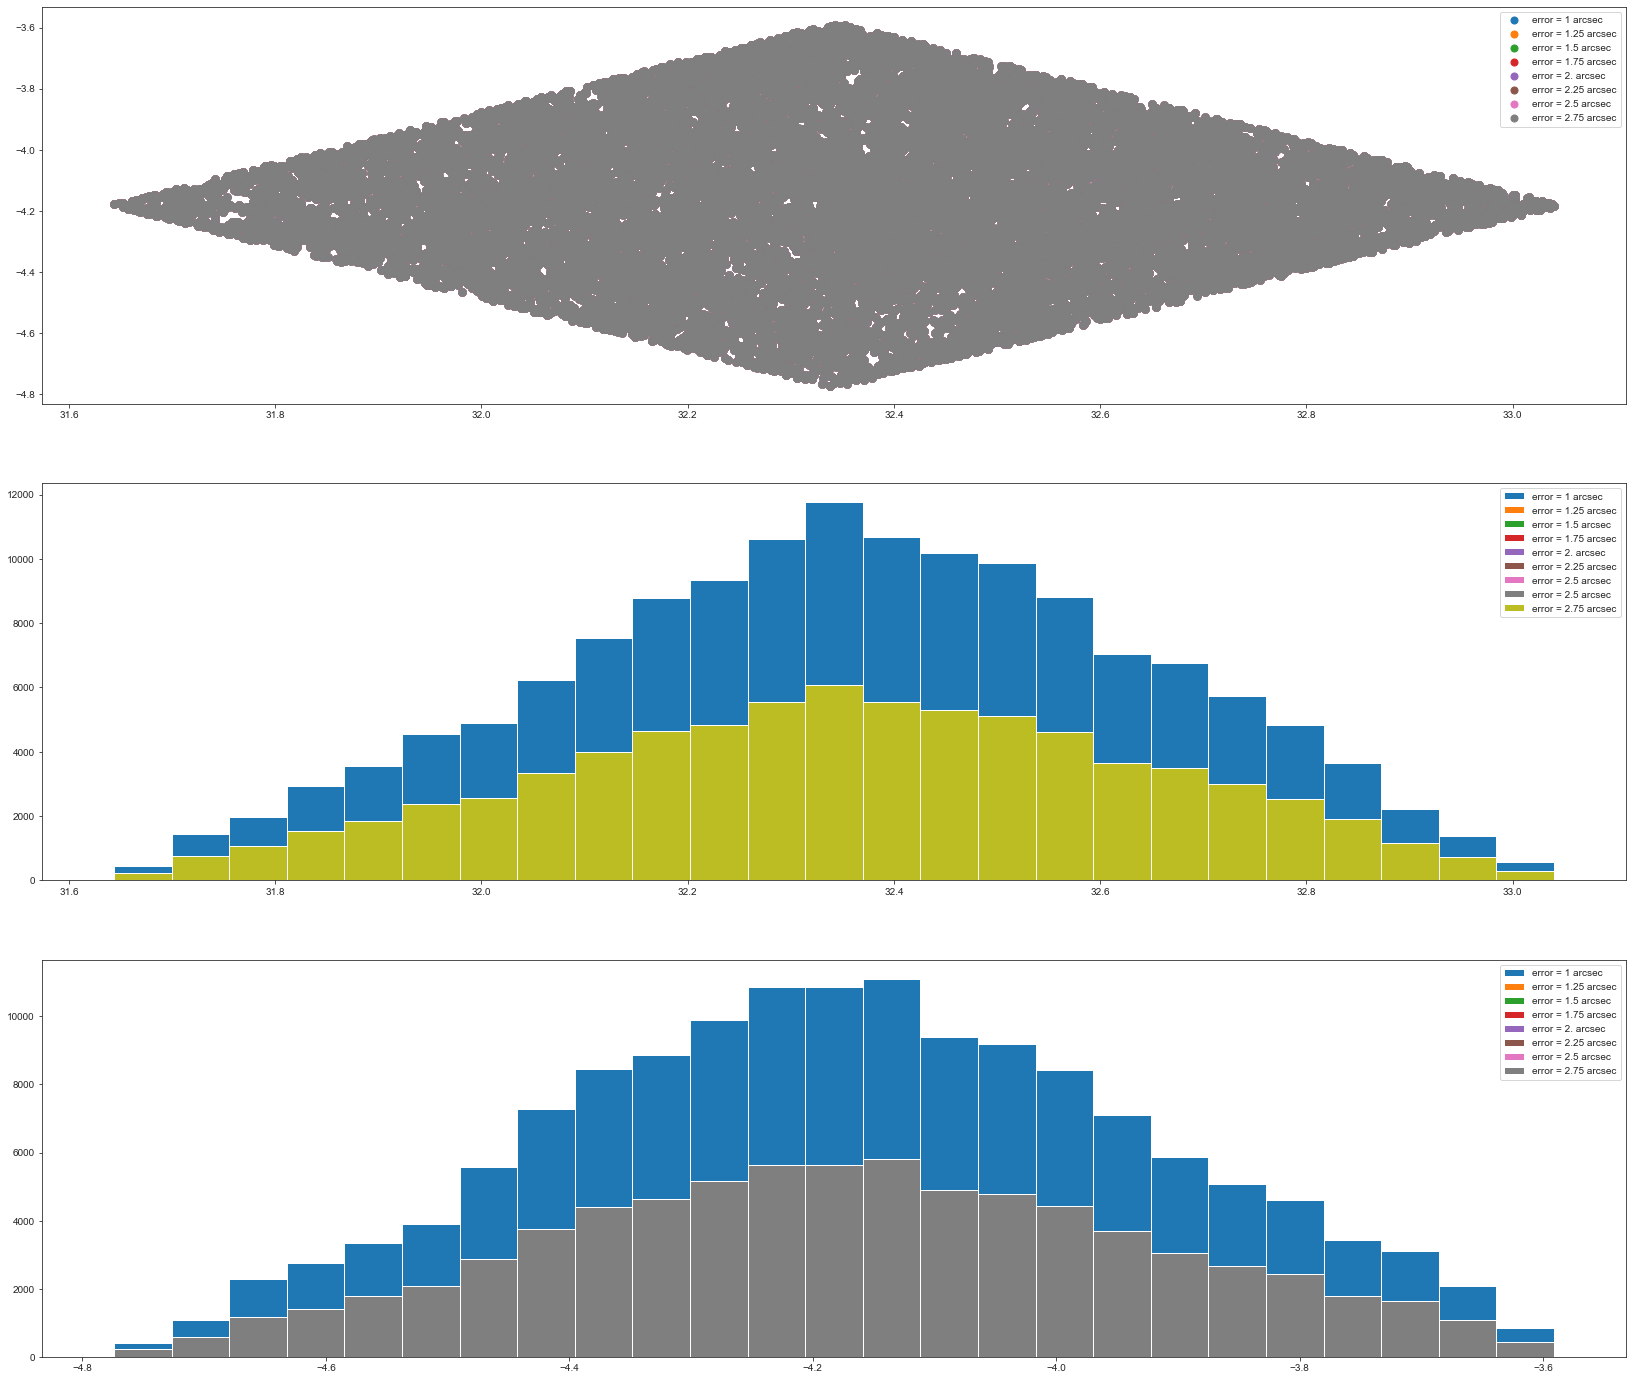

In [67]:
fig = plt.figure(figsize=(16,10))
grid = plt.GridSpec(3,2, top = 2,right = 1.5)
ax = plt.subplot(grid[0,:])
#plt.xlim(0,100)
plt.scatter(tab1["RA"],tab1["DEC"],s = 50, label = "error = 1 arcsec")
plt.scatter(tab2["RA"],tab2["DEC"],s = 50, label = "error = 1.25 arcsec")
plt.scatter(tab3["RA"],tab3["DEC"],s = 50, label = "error = 1.5 arcsec")
plt.scatter(tab4["RA"],tab4["DEC"],s = 50, label = "error = 1.75 arcsec")
plt.scatter(tab5["RA"],tab5["DEC"],s = 50, label = "error = 2. arcsec")
plt.scatter(tab6["RA"],tab6["DEC"],s = 50, label = "error = 2.25 arcsec")
plt.scatter(tab7["RA"],tab7["DEC"],s = 50, label = "error = 2.5 arcsec")
plt.scatter(tab8["RA"],tab8["DEC"],s = 50, label = "error = 2.75 arcsec")

plt.legend()
ax = plt.subplot(grid[1,:])

plt.hist(tab1["RA"],bins = 25, label = "error = 1 arcsec")
plt.hist(tab2["RA"],bins = 25, label = "error = 1.25 arcsec")
plt.hist(tab3["RA"],bins = 25, label = "error = 1.5 arcsec")
plt.hist(tab4["RA"],bins = 25, label = "error = 1.75 arcsec")
plt.hist(tab5["RA"],bins = 25, label = "error = 2. arcsec")
plt.hist(tab6["RA"],bins = 25, label = "error = 2.25 arcsec")
plt.hist(tab7["RA"],bins = 25, label = "error = 2.5 arcsec")
plt.hist(tab7["RA"],bins = 25, label = "error = 2.5 arcsec")
plt.hist(tab8["RA"],bins = 25, label = "error = 2.75 arcsec")


plt.legend()
#ax = plt.subplot(grid[1,1])
#plt.hist(des['RA'], label = 'DES.RA', color = 'blue', bins = 250)
#plt.xlim(0,50)
#plt.legend()
ax = plt.subplot(grid[2,:])
plt.hist(tab1["DEC"],bins = 25, label = "error = 1 arcsec")
plt.hist(tab2["DEC"],bins = 25, label = "error = 1.25 arcsec")
plt.hist(tab3["DEC"],bins = 25, label = "error = 1.5 arcsec")
plt.hist(tab4["DEC"],bins = 25, label = "error = 1.75 arcsec")
plt.hist(tab5["DEC"],bins = 25, label = "error = 2. arcsec")
plt.hist(tab6["DEC"],bins = 25, label = "error = 2.25 arcsec")
plt.hist(tab7["DEC"],bins = 25, label = "error = 2.5 arcsec")
plt.hist(tab8["DEC"],bins = 25, label = "error = 2.75 arcsec")

#plt.xlim(-10,-0)
#plt.hist(tab['DEC_1'], label = 'VVDS/VIPER x DES', color = 'orange', bins = 100)
#plt.hist(des['DEC'], label = 'DES', color = 'green', bins = 100)

plt.legend()
#ax = plt.subplot(grid[2,1])
#plt.hist(des['DEC'], label = 'DES.DEC', color = 'blue', bins = 100)

#plt.legend()
plt.savefig("taball.png",dpi = 300,bbox_inches = 'tight')

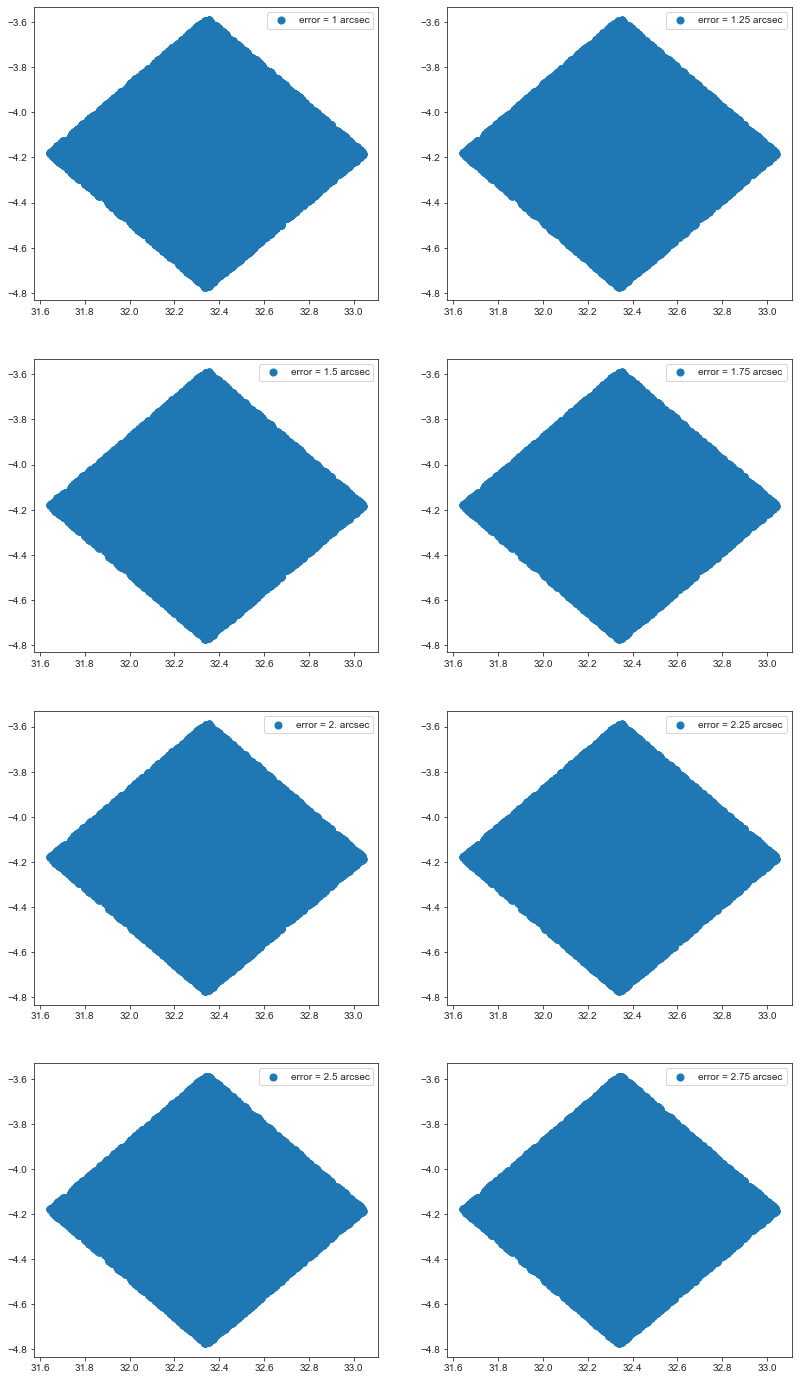

In [68]:
fig = plt.figure(figsize=(16,10))
grid = plt.GridSpec(4,4, top = 2,right = 1.5)
ax = plt.subplot(grid[0,0])
plt.scatter(tab1["RA"],tab1["DEC"],s = 50, label = "error = 1 arcsec")
plt.legend()

ax = plt.subplot(grid[0,1])
plt.scatter(tab2["RA"],tab2["DEC"],s = 50, label = "error = 1.25 arcsec")
plt.legend()

ax = plt.subplot(grid[1,0])

plt.scatter(tab3["RA"],tab3["DEC"],s = 50,label = "error = 1.5 arcsec")
plt.legend()

ax = plt.subplot(grid[1,1])
plt.scatter(tab4["RA"],tab4["DEC"],s = 50, label = "error = 1.75 arcsec")
plt.legend()

ax = plt.subplot(grid[2,0])
plt.scatter(tab5["RA"],tab5["DEC"],s = 50, label = "error = 2. arcsec")
plt.legend()

ax = plt.subplot(grid[2,1])
plt.scatter(tab6["RA"],tab6["DEC"],s = 50, label = "error = 2.25 arcsec")
plt.legend()

ax = plt.subplot(grid[3,0])
plt.scatter(tab7["RA"],tab7["DEC"],s = 50, label = "error = 2.5 arcsec")
plt.legend()

ax = plt.subplot(grid[3,1])
plt.scatter(tab8["RA"],tab8["DEC"],s = 50, label = "error = 2.75 arcsec")
plt.legend()

plt.savefig("ra_decScatter.png",dpi = 300,bbox_inches = 'tight')


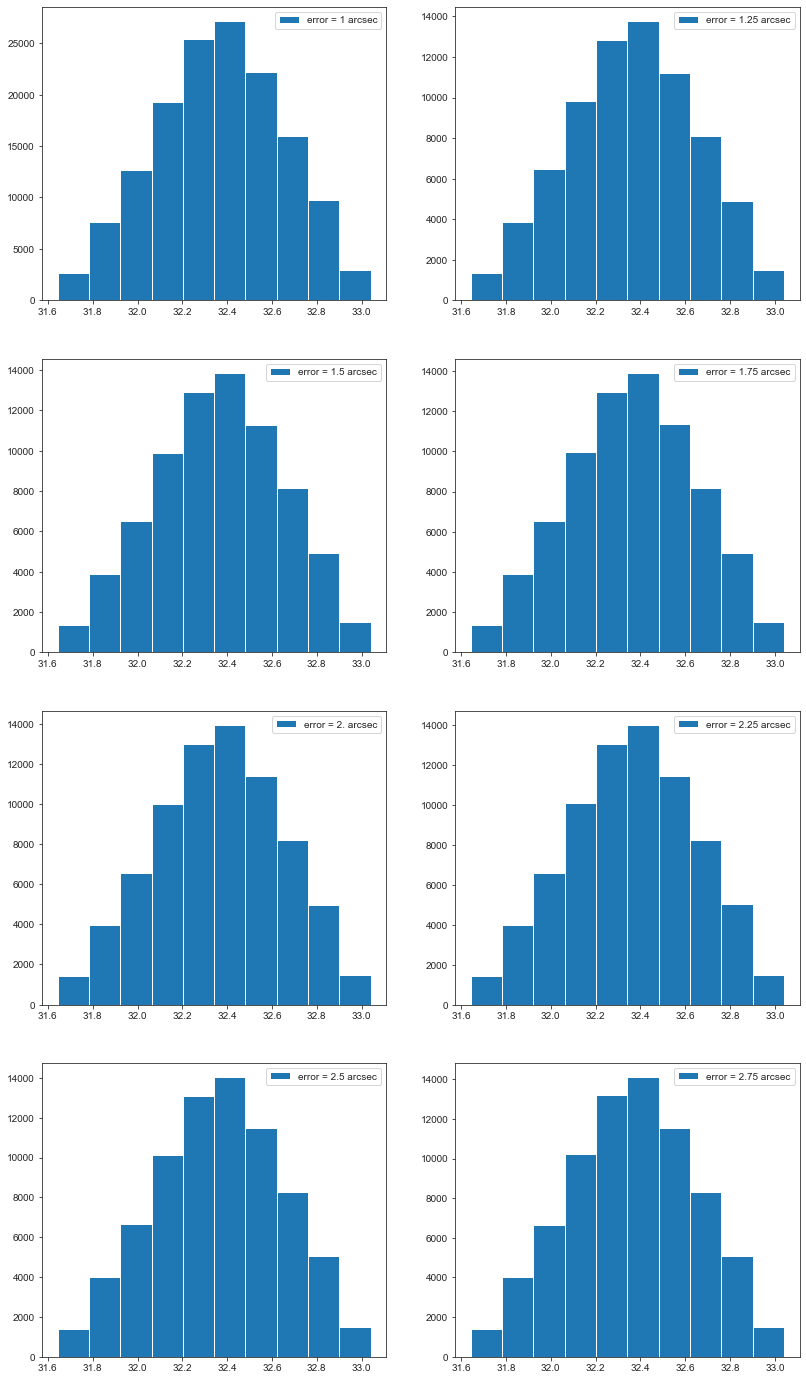

In [69]:
fig = plt.figure(figsize=(16,10))
grid = plt.GridSpec(4,4, top = 2,right = 1.5)
ax = plt.subplot(grid[0,0])
plt.hist(tab1["RA"], label = "error = 1 arcsec")
plt.legend()

ax = plt.subplot(grid[0,1])
plt.hist(tab2["RA"], label = "error = 1.25 arcsec")
plt.legend()

ax = plt.subplot(grid[1,0])

plt.hist(tab3["RA"] ,label = "error = 1.5 arcsec")
plt.legend()

ax = plt.subplot(grid[1,1])
plt.hist(tab4["RA"], label = "error = 1.75 arcsec")
plt.legend()

ax = plt.subplot(grid[2,0])
plt.hist(tab5["RA"], label = "error = 2. arcsec")
plt.legend()

ax = plt.subplot(grid[2,1])
plt.hist(tab6["RA"], label = "error = 2.25 arcsec")
plt.legend()

ax = plt.subplot(grid[3,0])
plt.hist(tab7["RA"], label = "error = 2.5 arcsec")
plt.legend()

ax = plt.subplot(grid[3,1])
plt.hist(tab8["RA"], label = "error = 2.75 arcsec")
plt.legend()

plt.savefig('raHist.png',dpi = 300,bbox_inches = 'tight')

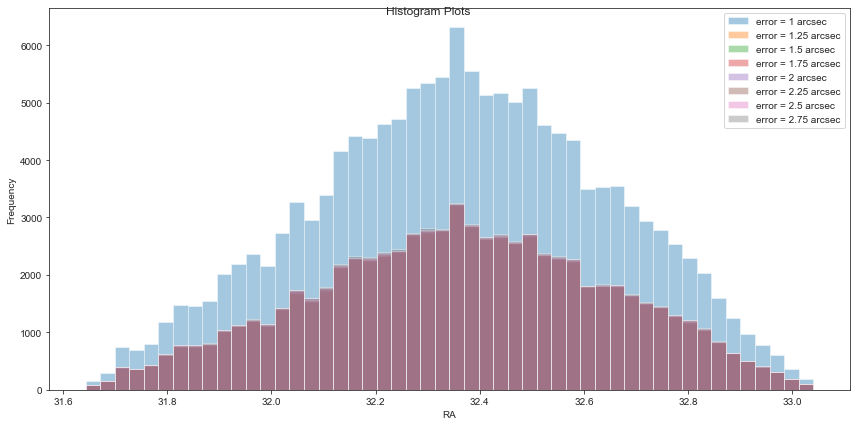

In [66]:
feat = ['RA','DEC']
plt.figure(figsize=(12,6))
plt.suptitle('Histogram Plots')
sns.set_style("ticks")
sns.distplot(tab1[feat[0]], hist = True, kde = False, kde_kws = {'shade': True, 'linewidth': 3}, label = 'error = 1 arcsec')
sns.distplot(tab2[feat[0]], hist = True, kde = False, kde_kws = {'shade': True, 'linewidth': 3}, label = 'error = 1.25 arcsec')
sns.distplot(tab3[feat[0]], hist = True, kde = False, kde_kws = {'shade': True, 'linewidth': 3}, label = 'error = 1.5 arcsec')
sns.distplot(tab4[feat[0]], hist = True, kde = False, kde_kws = {'shade': True, 'linewidth': 3}, label = 'error = 1.75 arcsec')
sns.distplot(tab5[feat[0]], hist = True, kde = False, kde_kws = {'shade': True, 'linewidth': 3}, label = 'error = 2 arcsec')
sns.distplot(tab6[feat[0]], hist = True, kde = False, kde_kws = {'shade': True, 'linewidth': 3}, label = 'error = 2.25 arcsec')
sns.distplot(tab7[feat[0]], hist = True, kde = False, kde_kws = {'shade': True, 'linewidth': 3}, label = 'error = 2.5 arcsec')
sns.distplot(tab8[feat[0]], hist = True, kde = False, kde_kws = {'shade': True, 'linewidth': 3}, label = 'error = 2.75 arcsec')
plt.legend()
plt.xlabel(feat[0])
plt.ylabel('Frequency')
plt.tight_layout()

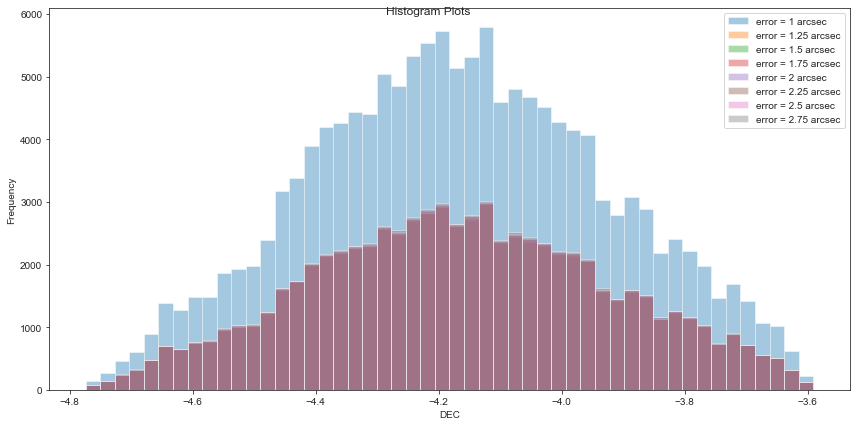

In [70]:
feat = ['RA','DEC']
plt.figure(figsize=(12,6))
plt.suptitle('Histogram Plots')
sns.set_style("ticks")
sns.distplot(tab1[feat[1]], hist = True, kde = False, kde_kws = {'shade': True, 'linewidth': 3}, label = 'error = 1 arcsec')
sns.distplot(tab2[feat[1]], hist = True, kde = False, kde_kws = {'shade': True, 'linewidth': 3}, label = 'error = 1.25 arcsec')
sns.distplot(tab3[feat[1]], hist = True, kde = False, kde_kws = {'shade': True, 'linewidth': 3}, label = 'error = 1.5 arcsec')
sns.distplot(tab4[feat[1]], hist = True, kde = False, kde_kws = {'shade': True, 'linewidth': 3}, label = 'error = 1.75 arcsec')
sns.distplot(tab5[feat[1]], hist = True, kde = False, kde_kws = {'shade': True, 'linewidth': 3}, label = 'error = 2 arcsec')
sns.distplot(tab6[feat[1]], hist = True, kde = False, kde_kws = {'shade': True, 'linewidth': 3}, label = 'error = 2.25 arcsec')
sns.distplot(tab7[feat[1]], hist = True, kde = False, kde_kws = {'shade': True, 'linewidth': 3}, label = 'error = 2.5 arcsec')
sns.distplot(tab8[feat[1]], hist = True, kde = False, kde_kws = {'shade': True, 'linewidth': 3}, label = 'error = 2.75 arcsec')

plt.legend()
plt.xlabel(feat[1])
plt.ylabel('Frequency')
plt.tight_layout()

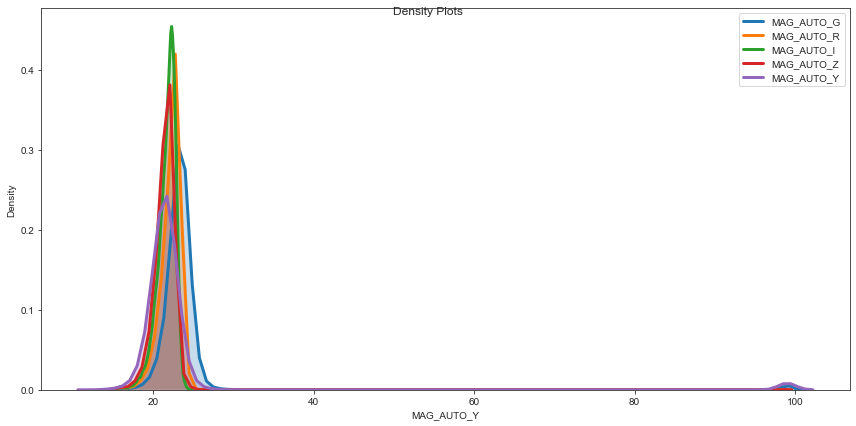

In [59]:
features = ['MAG_AUTO_G','MAG_AUTO_R','MAG_AUTO_I','MAG_AUTO_Z','MAG_AUTO_Y']

plt.figure(figsize=(12,6))
plt.suptitle('Density Plots')
sns.set_style("ticks")
for j in range(len(features)):
    sns.distplot(tab1[features[j]], hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 3}, label = features[j])
    plt.legend()
    plt.xlabel(features[j])
    plt.ylabel('Density')
plt.tight_layout()


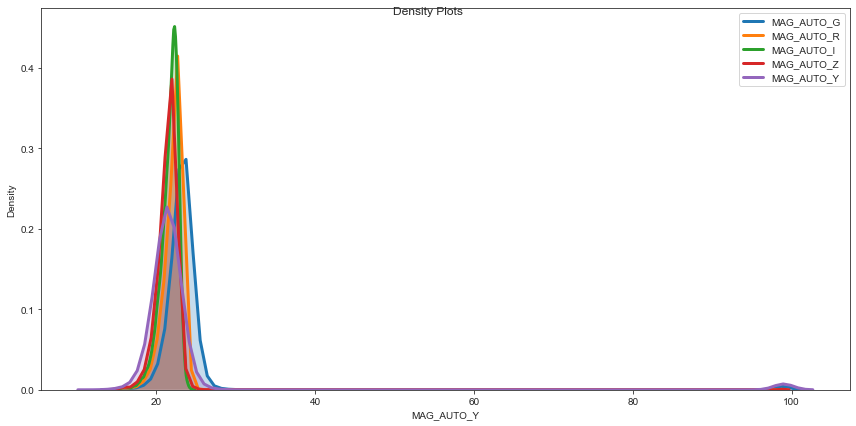

In [60]:
features = ['MAG_AUTO_G','MAG_AUTO_R','MAG_AUTO_I','MAG_AUTO_Z','MAG_AUTO_Y']

plt.figure(figsize=(12,6))
plt.suptitle('Density Plots')
sns.set_style("ticks")
for j in range(len(features)):
    sns.distplot(tab2[features[j]], hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 3}, label = features[j])
    plt.legend()
    plt.xlabel(features[j])
    plt.ylabel('Density')
plt.tight_layout()
